In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np


In [3]:
airlines=pd.read_csv('EastWestAirlines.csv')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)  

In [6]:
df_norm = norm_func(airlines.iloc[:,1:])  
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


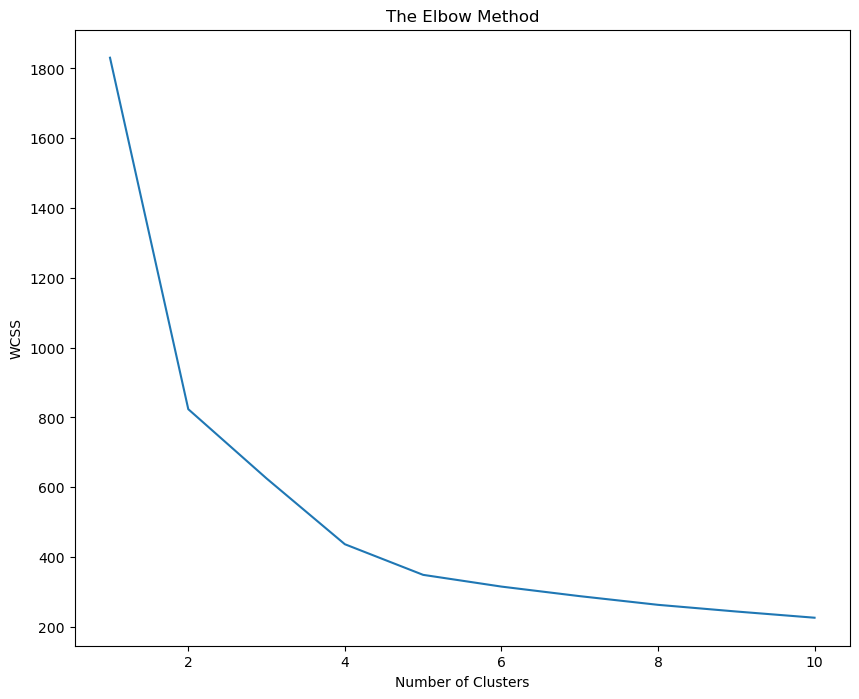

In [7]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) 
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [8]:
clf = KMeans(n_clusters=5)    #from the curve we considered no.of clusters = 5
y_kmeans = clf.fit_predict(df_norm)  

In [9]:
clf.labels_ 

array([3, 3, 3, ..., 4, 0, 0])

In [10]:
y_kmeans

array([3, 3, 3, ..., 4, 0, 0])

In [11]:
clf.cluster_centers_

array([[ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01, -3.88578059e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -2.77555756e-16],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01, -4.99600361e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
  

In [12]:
clf.inertia_

348.9433217254137

In [13]:
md=pd.Series(y_kmeans)
airlines['clust']=md 
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [15]:
airlines.iloc[:,1:7].groupby(airlines.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
clust,,,,,,
0,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245
2,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204
3,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885
4,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178


Text(0.5, 1.0, 'Clusters using KMeans')

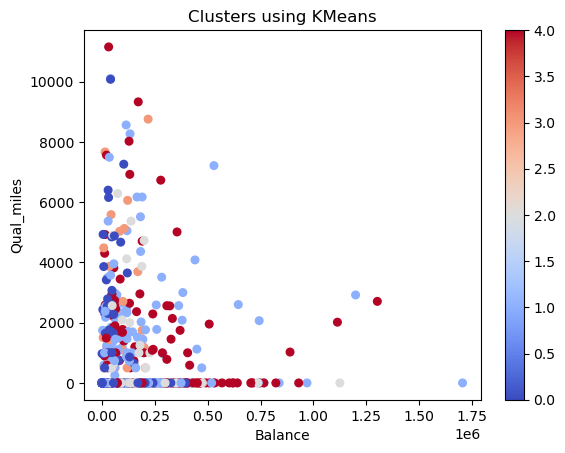

In [17]:
airlines.plot(x="Balance",y ="Qual_miles",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [20]:
clf = KMeans(n_clusters=6)    #from the curve we considered no.of clusters = 5
y_kmeans = clf.fit_predict(df_norm)  

Text(0.5, 1.0, 'Clusters using KMeans')

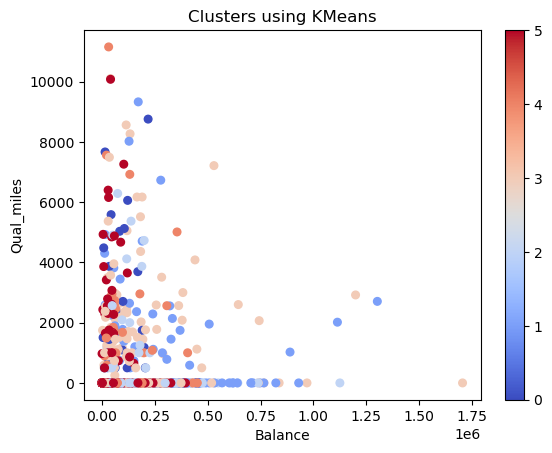

In [21]:
airlines.plot(x="Balance",y ="Qual_miles",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [22]:
clf = KMeans(n_clusters=4)    #from the curve we considered no.of clusters = 5
y_kmeans = clf.fit_predict(df_norm)  

Text(0.5, 1.0, 'Clusters using KMeans')

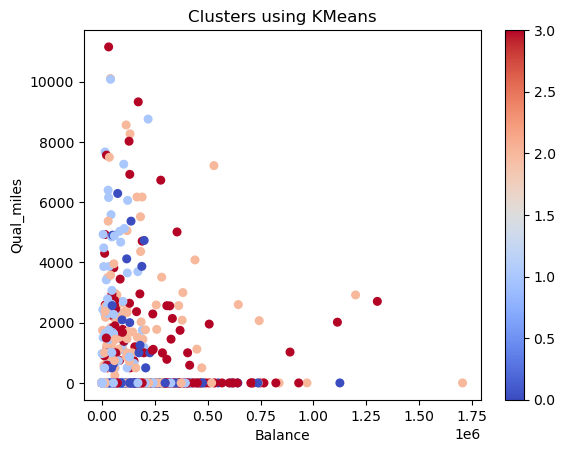

In [23]:
airlines.plot(x="Balance",y ="Qual_miles",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [24]:
clf = KMeans(n_clusters=8)    #from the curve we considered no.of clusters = 5
y_kmeans = clf.fit_predict(df_norm)  

Text(0.5, 1.0, 'Clusters using KMeans')

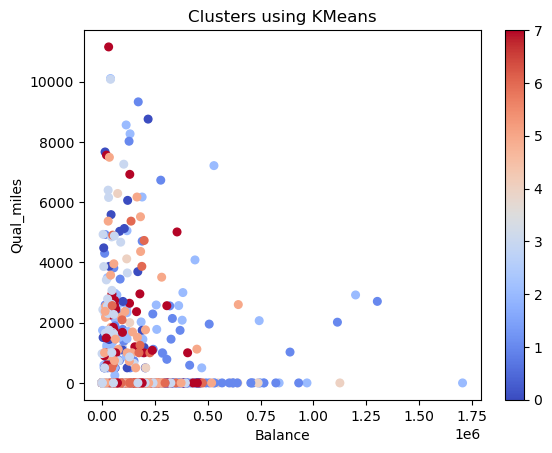

In [25]:
airlines.plot(x="Balance",y ="Qual_miles",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [34]:
clf = KMeans(n_clusters=10)    #from the curve we considered no.of clusters = 5
y_kmeans = clf.fit_predict(df_norm) 

Text(0.5, 1.0, 'Clusters using KMeans')

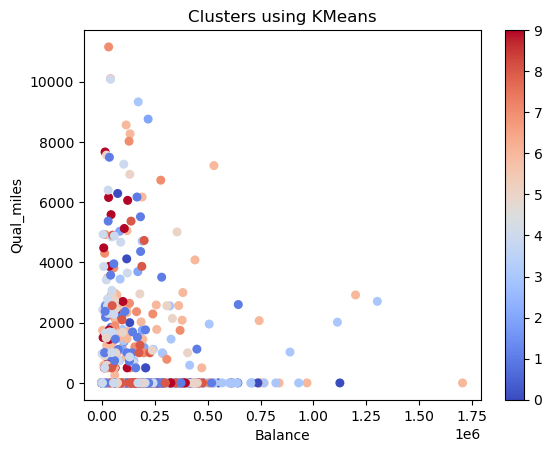

In [35]:
airlines.plot(x="Balance",y ="Qual_miles",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [ ]:
airlines.plot(x="Balance",y ="Qual_miles",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')